# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

Evolutionary PDEs
=================

In [11]:
%matplotlib inline

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

### Partial differential equations

Partial differential equations (PDEs) involve derivatives of functions
of more than one variable, say $u(x, y)$ or $y(t,
  x)$. Hence more complex behaviour and more interesting physics.

Only look at linear problems. Also only consider finite difference
methods: simple to analyse but not always competitive.

Here consider simple methods for evolutionary problems; that is, for
simple hyperbolic and parabolic equations.

### The problems

Prototypes: *parabolic* heat and *hyperbolic* wave equations:

$$\partial_{t} y - k \partial_{x x} y = 0, \qquad \partial_{t t} y -
c^2 \partial_{x x} y = 0.$$

Second time derivatives awkward: use *advection* equation

$$\partial_{t} y + v \partial_{x} y = 0.$$

Use $q_{\pm} = \partial_t y \mp c \partial_x y$ in wave equation:

$$\partial_t
\begin{pmatrix}
  q_+ \\ q_-
\end{pmatrix} + c \partial_x
\begin{pmatrix}
  q_+ \\ -q_-
\end{pmatrix} = 0:$$

just a pair of advection equations.

Finite Difference Methods
-------------------------

As before our strategy will be

1.  Introduce grid (equally spaced for simplicity) covering domain. Bounded in space ($x \in [0,1]$ in following), semi-infinite in time ($t \ge 0$ in following).

2.  Replace PDE with finite differences. Only works for interior points (in space).

3.  Rearrange interior difference equations to get either

    -   *Explicit* method: value of interior points given known data
        (boundary data or previously computed interior points), or

    -   *Implicit* method:, value of interior points depends on
        other interior points whose value is not known; these methods
        typically involve solving a linear system.

### The Grid

Introduce grid. Initial conditions fix known data.

This allows interior update.

Applying boundary conditions completes one iteration.


Further iterations same.


Boundary conditions used at every step.


The algorithm can go on forever.


Note: write discrete grid points

$$(x_i, t^n), \quad 0 \le i \le N+1, \,\, n \ge 0$$

where $i, n$ are integer grid indices. $t^2$ means “the second time
step”, not “$t$ squared”.


From spatial boundaries get grid spacing

$$h = 1 / (N+1).$$

However timestep, $\delta$, can be set freely.

Heat Equation
=============

FTCS
----

Look at heat equation with $k=1$,

$$\partial_{t} y - \partial_{x x} y = 0.$$


Assume initial conditions known, $y(x, 0) = g(x)$ and trivial boundary
conditions given

$$y(0, t) = 0, \quad y(1, t) = 0.$$

Introduce grid $(x_i, t^n)$. Initial condition gives
values at $t^0 \implies y_i^0$.

Convert heat equation to difference equation. Standard approach is
central differencing:

$$\partial_{x x} y |_{x = x_i} = \frac{ y_{i+1} + y_{i-1} - 2 y_i}{h^2} + {\cal O}(h^4).$$

$$\partial_{t} y - \partial_{x x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = 0, \,\, y(1, t) = 0.$$

$$\partial_{x x} y |_{x = x_i} = \frac{ y_{i+1} + y_{i-1} - 2
y_i}{h^2} + {\cal O}(h^4).$$

Central differencing in *time* difficult [only one time slice ($t^0$)
known]; instead use *forward* differencing

$$\partial_t y |_{t = t^n} = \frac{y^{n+1} - y^n}{\delta} + {\cal
O}(\delta^2).$$


Substituting in the difference formulas and rearranging gives

$$\begin{aligned}
&& y_i^{n+1} & = y_i^n + \frac{\delta}{h^2} \left( y_{i+1}^n +
  y_{i-1}^n - 2 y_i^n \right); \\
s = \delta / h^2 & \implies &
y_i^{n+1} &= ( 1 - 2 s ) y_i^n + s \left( y_{i+1}^n +
  y_{i-1}^n \right).
\end{aligned}$$

 *Explicit* algorithm called FTCS (Forward Time, Centred
Space).

### Example

Apply FTCS to heat equation. Initial data is “tent” function. Choose
timestep such that $s = 1/3$.

Result evolves in roughly the right fashion. Increasing resolution
improves accuracy as we evolve.

Convergence check: second order convergence.

In [13]:
def initial_data(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        if (x[i] < 0.25):
            y[i] = 0.0
        elif (x[i] < 0.5):
            y[i] = 4.0 * (x[i] - 0.25)
        elif (x[i] < 0.75):
            y[i] = 4.0 * (0.75 - x[i])
        else:
            y[i] = 0.0
            
    return y

def heat_exact(x, t, kmax = 150):
    """Exact solution from separation of variables"""

    yexact = np.zeros_like(x)
    for k in range(1, kmax):
        d = -8.0*(np.sin(k*np.pi/4.0)-2.0*np.sin(k*np.pi/2.0)+np.sin(3.0*k*np.pi/4.0))/((np.pi*k)**2)
        yexact += d*np.exp(-(k*np.pi)**2*t)*np.sin(k*np.pi*x)
        
    return yexact
    
def ftcs_heat(y, ynew, s):
    ynew[1:-1] = (1 - 2.0 * s) * y[1:-1] + s * (y[2:] + y[:-2])
    # Trivial boundary conditions
    ynew[0] = 0.0
    ynew[-1] = 0.0
    
Nx = 10
h = 1.0 / (Nx + 1.0)
t_end = 0.25
s = 1.0 / 3.0 # s = delta / h^2
delta = s * h**2
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    ftcs_heat(y, ynew, s)
    y = ynew

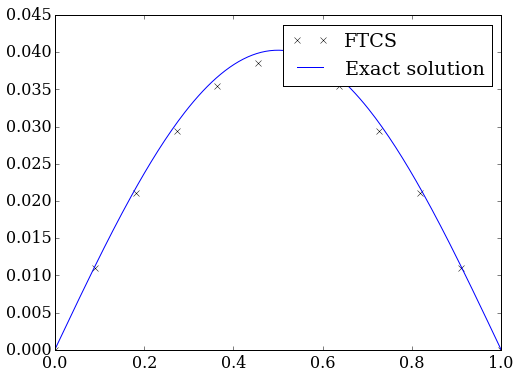

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'FTCS')
ax.plot(x_exact, heat_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend()
plt.show()

In [15]:
Npoints = [10*2**i for i in range(7)]
h = 1.0 / (np.array(Npoints) + 1.0)
ftcs_heat_error = np.zeros_like(h)

for i in range(len(Npoints)):
    Nx = Npoints[i]
    delta = s * h[i]**2
    Nt = int(t_end / delta)+1

    x = np.linspace(0.0, 1.0, Nx+2)
    y = initial_data(x)
    ynew = np.zeros_like(y)
    for n in range(Nt):
        ftcs_heat(y, ynew, s)
        y = ynew
        
    ftcs_heat_error[i] = np.linalg.norm(y - heat_exact(x, t_end), 2) * np.sqrt(h[i])

In [16]:
fit = np.polyfit(np.log(h[1:]), np.log(ftcs_heat_error[1:]), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(h, ftcs_heat_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(h, np.exp(fit[1])*h**(fit[0]), 'b-', label=fitlabel)
ax.set_xlabel("$h$")
ax.set_ylabel("Errors")
ax.legend(loc=2)
plt.show()

Fixing $s = \delta / h^2 = 1/3$ is a severe restriction
on time step. Double $n \implies h$ reduced by half $\implies \delta$
reduced by a quarter.

Instead increase timestep setting $s=2/3$. Less restrictive, but
evolution not as good. In fact, it seems to be rubbish.


Increasing resolution helped before; now just make things worse.


No convergence at all!

In [17]:
Nx = 10
h = 1.0 / (Nx + 1.0)
t_end = 0.05
s = 2.0 / 3.0 # s = delta / h^2
delta = s * h**2
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    ftcs_heat(y, ynew, s)
    y = ynew

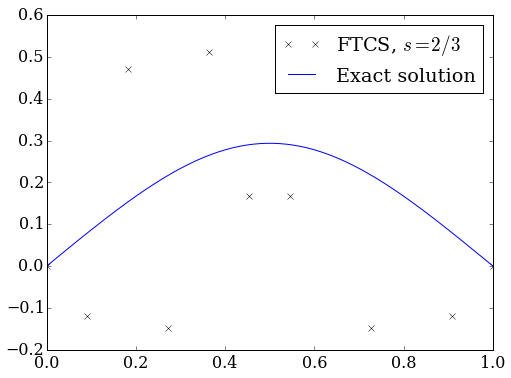

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'FTCS, $s = 2/3$')
ax.plot(x_exact, heat_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend()
plt.show()

In [19]:
Npoints = [10*i for i in range(7)]
h = 1.0 / (np.array(Npoints) + 1.0)
ftcs_heat_error = np.zeros_like(h)

for i in range(len(Npoints)):
    Nx = Npoints[i]
    delta = s * h[i]**2
    Nt = int(t_end / delta)+1

    x = np.linspace(0.0, 1.0, Nx+2)
    y = initial_data(x)
    ynew = np.zeros_like(y)
    for n in range(Nt):
        ftcs_heat(y, ynew, s)
        y = ynew
        
    ftcs_heat_error[i] = np.linalg.norm(y - heat_exact(x, t_end), 2) * np.sqrt(h[i])

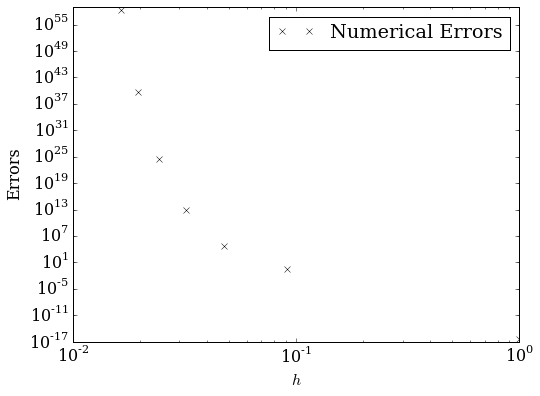

In [20]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(h, ftcs_heat_error, 'kx', label='Numerical Errors')
ax.set_xlabel("$h$")
ax.set_ylabel("Errors")
ax.legend(loc=1)
plt.show()

BTCS
----

FTCS has problems where $s > 1/2$: a limitation. Instead modify finite differencing to improve behaviour. 

Still have the problem

$$\partial_{t} y - \partial_{x x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = 0, \,\, y(1, t) = 0$$

and central differencing in space

$$\partial_{x x} y |_{x = x_i} = \frac{ y_{i+1} + y_{i-1} - 2 y_i}{h^2} + {\cal O}(h^4).$$


Try *backward* differencing in time,

$$\partial_t y |_{t = t^{n+1}} = \frac{y^{n+1} - y^n}{\delta} + {\cal
O}(\delta^2).$$


$$\partial_{t} y - \partial_{x x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = 0, \,\, y(1, t) = 0.$$

$$\partial_{x x} y |_{x = x_i} = \frac{ y_{i+1} + y_{i-1} - 2 y_i}{h^2} + {\cal O}(h^4).$$

$$\partial_t y |_{t = t^{n+1}} = \frac{y^{n+1} - y^n}{\delta} + {\cal O}(\delta^2).$$

Substituting in the difference formulas and rearranging gives

$$\begin{aligned}
&& y_i^{n+1} & = y_i^n + \frac{\delta}{h^2} \left( y_{i+1}^{n+1} +
  y_{i-1}^{n+1} - 2 y_i^{n+1} \right); \\
s = \delta / h^2 & \implies & (1 + 2 s) y_i^{n+1} & = y_i^n +
s \left( y_{i+1}^{n+1} + y_{i-1}^{n+1} \right).
\end{aligned}$$

This *implicit* algorithm is called BTCS (Backward Time,
Centred Space). It requires solving a linear system.

### BTCS - linear system

BTCS can be written

$$(1 + 2 s) y_i^{n+1} - s \left( y_{i+1}^{n+1} + y_{i-1}^{n+1}
\right) = y_i^n.$$

See directly that we have the linear system

$$A {\boldsymbol{y}}^{n+1} = {\boldsymbol{y}}^n + {\boldsymbol{F}}$$

where the matrix is, for example

$$\begin{pmatrix}
1 + 2 s & -s & 0 & 0 & \dots \\
-s & 1 + 2 s & -s & 0 & \dots \\
0 & -s & 1 + 2 s & -s & \dots \\
\vdots & \ddots & \ddots & \ddots & \ddots
\end{pmatrix}$$

and the known vector is ($y_0, y_{N+1}$ from boundary conditions)

$${\boldsymbol{F}} = 
\begin{pmatrix}
   y_0^n + s y_0^{n+1} & y_1^n & \dots & y_2^n & y_{N+1}^n + s y_{N+1}^{n+1}
\end{pmatrix}^T.$$

### Example

Apply BTCS to heat equation. Initial data is “tent” function. Choose
timestep such that $s = 1/2$.

Result evolves in roughly the right fashion. Increasing resolution
improves accuracy as we evolve.

Convergence check: second order convergence.

In [21]:
def btcs_heat(y, ynew, s):
    F = y[1:-1]
    A = (1.0 + 2.0*s)*np.eye(len(F)) - s*np.diagflat(np.ones((len(F)-1,1)), -1) - s*np.diagflat(np.ones((len(F)-1,1)), 1)
    ynew[1:-1] = np.linalg.solve(A, F)
    # Trivial boundary conditions
    ynew[0] = 0.0
    ynew[-1] = 0.0
    
Nx = 10
h = 1.0 / (Nx + 1.0)
t_end = 0.25
s = 1.0 / 2.0 # s = delta / h^2
delta = s * h**2
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    btcs_heat(y, ynew, s)
    y = ynew

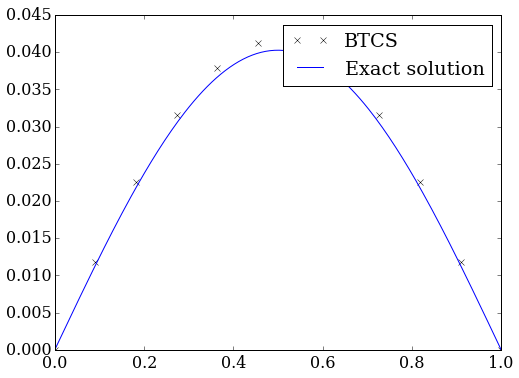

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'BTCS')
ax.plot(x_exact, heat_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend()
plt.show()

In [23]:
Npoints = [10*2**i for i in range(5)]
h = 1.0 / (np.array(Npoints) + 1.0)
btcs_heat_error = np.zeros_like(h)

for i in range(len(Npoints)):
    Nx = Npoints[i]
    delta = s * h[i]**2
    Nt = int(t_end / delta)+1

    x = np.linspace(0.0, 1.0, Nx+2)
    y = initial_data(x)
    ynew = np.zeros_like(y)
    for n in range(Nt):
        btcs_heat(y, ynew, s)
        y = ynew
        
    btcs_heat_error[i] = np.linalg.norm(y - heat_exact(x, t_end), 2) * np.sqrt(h[i])

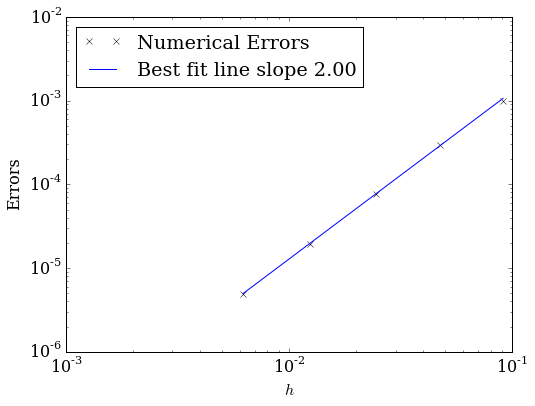

In [24]:
fit = np.polyfit(np.log(h[1:]), np.log(btcs_heat_error[1:]), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(h, btcs_heat_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(h, np.exp(fit[1])*h**(fit[0]), 'b-', label=fitlabel)
ax.set_xlabel("$h$")
ax.set_ylabel("Errors")
ax.legend(loc=2)
plt.show()

Fixing $s = \delta / h^2 = 1/2$ is a severe restriction on the
time step. Double $n \implies h$ reduced by half $\implies \delta$
reduced by a quarter.

Instead increase $s$ to $5$: less restrictive and evolution appears
reasonable.

Increasing resolution helps here.


Still have second order convergence.

In [25]:
Nx = 10
h = 1.0 / (Nx + 1.0)
t_end = 0.25
s = 5.0 # s = delta / h^2
delta = s * h**2
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    btcs_heat(y, ynew, s)
    y = ynew

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'BTCS, $s=5$')
ax.plot(x_exact, heat_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend()
plt.show()

In [27]:
Npoints = [10*2**i for i in range(5)]
h = 1.0 / (np.array(Npoints) + 1.0)
btcs_heat_error = np.zeros_like(h)

for i in range(len(Npoints)):
    Nx = Npoints[i]
    delta = s * h[i]**2
    Nt = int(t_end / delta)+1

    x = np.linspace(0.0, 1.0, Nx+2)
    y = initial_data(x)
    ynew = np.zeros_like(y)
    for n in range(Nt):
        btcs_heat(y, ynew, s)
        y = ynew
        
    btcs_heat_error[i] = np.linalg.norm(y - heat_exact(x, t_end), 2) * np.sqrt(h[i])

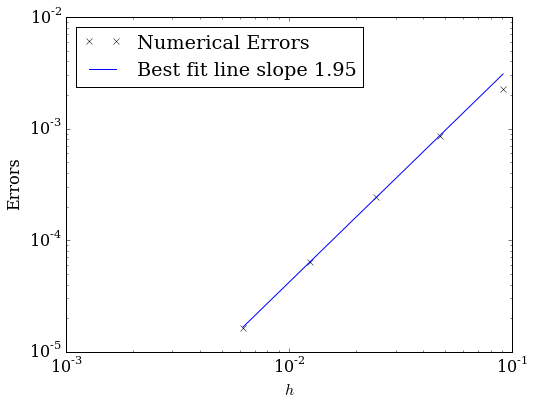

In [28]:
fit = np.polyfit(np.log(h[1:]), np.log(btcs_heat_error[1:]), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(h, btcs_heat_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(h, np.exp(fit[1])*h**(fit[0]), 'b-', label=fitlabel)
ax.set_xlabel("$h$")
ax.set_ylabel("Errors")
ax.legend(loc=2)
plt.show()

Advection Equation
==================

FTCS
----

Now look at advection equation with $v=1$,

$$\partial_{t} y + \partial_{x} y = 0.$$


Assume initial conditions known, $y(x, 0) = g(x)$ and *periodic*
boundary conditions given:

$$y(0, t) = y(1, t).$$

Introduce grid $(x_i, t^n)$. Initial condition gives
values at $t^0 \implies y_i^0$. 

Convert advection equation to difference equation. Standard approach is
central differencing:

$$\partial_{x} y |_{x = x_i} = \frac{ y_{i+1} - y_{i-1}}{2 h} +
{\cal O}(h^2).$$

$$\partial_{t} y + \partial_{x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = y(1, t).$$

$$\partial_{x} y |_{x = x_i} = \frac{ y_{i+1} - y_{i-1}}{2 h} +
{\cal O}(h^2).$$

As before use *forward* differencing in time,

$$\partial_t y |_{t = t^n} = \frac{y^{n+1} - y^n}{\delta} + {\cal
O}(\delta^2).$$


Substituting in the difference formulas and rearranging gives

$$\begin{aligned}
&& y_i^{n+1} & = y_i^n - \frac{\delta}{2 h} \left( y_{i+1}^n -
  y_{i-1}^n \right); \\
c = \delta / h & \implies &
y_i^{n+1} & = y_i^n - \frac{c}{2} \left( y_{i+1}^n -
  y_{i-1}^n \right).
\end{aligned}$$

*Explicit* algorithm again called FTCS (Forward Time,
Centred Space).

### Example

Apply FTCS to advection equation. Initial data a gaussian. Choose
timestep such that $c = 1/2$.

Result evolves in roughly the right fashion. Increasing resolution
introduces oscillations which blow up.

No sign of convergence. Modifying $c$ has no effect.

In [29]:
def initial_data(x):
    y = np.exp(-50.0 * (x-0.5)**2)
            
    return y

def advection_exact(x, t):
    """Exact solution from separation of variables"""

    yexact = np.zeros_like(x)
    x_shift = np.remainder(x - t, 1.0)
        
    return initial_data(x_shift)
    
def ftcs_advection(y, ynew, c):
    ynew[1:-1] = y[1:-1] - c / 2.0 * (y[2:] - y[:-2])
    # Periodic boundary conditions
    ynew[0] = y[0] - c / 2.0 * (y[1] - y[-2])
    ynew[-1] = ynew[0]
    
Nx = 10
h = 1.0 / (Nx + 1.0)
t_end = 0.25
c = 1.0 / 2.0 # c = delta / h
delta = c * h
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    ftcs_advection(y, ynew, s)
    y = ynew

In [30]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'FTCS')
ax.plot(x_exact, advection_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend(loc=2)
plt.show()

FTBS (Upwind)
-------------

 FTCS method is *sometimes* stable for heat equation, but
*never* stable for advection equation. Try modifying differencing to
improve behaviour in the hyperbolic case. 

$$\partial_{t} y + \partial_{x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = y(1, t).$$

Try modifying *spatial* differencing using *backward* differences:

$$\partial_{x} y |_{x = x_i} = \frac{y_{i} - y_{i-1}}{h} + {\cal
O}(h^2).$$


$$\partial_{t} y + \partial_{x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = y(1, t).$$

$$\partial_{x} y |_{x = x_i} = \frac{y_{i} - y_{i-1}}{h} + {\cal
O}(h^2).$$

Combine this with forward differencing in time,

$$\partial_t y |_{t = t^n} = \frac{y^{n+1} - y^n}{\delta} + {\cal
O}(\delta^2).$$


$$\partial_{t} y + \partial_{x} y = 0. \quad y(x, 0) = g(x),
\,\, y(0, t) = y(1, t).$$

$$\partial_{x} y |_{x = x_i} = \frac{y_{i} - y_{i-1}}{h} + {\cal
O}(h^2).$$

$$\partial_t y |_{t = t^n} = \frac{y^{n+1} - y^n}{\delta} + {\cal
O}(\delta^2).$$

Substituting in the difference formulas and rearranging gives

$$\begin{aligned}
&& y_i^{n+1} & = y_i^n - \frac{\delta}{h} \left( y_{i}^n -
  y_{i-1}^n \right), \\
c = \delta / h & \implies & 
y_i^{n+1} & = y_i^n - c \left( y_{i}^n - y_{i-1}^n \right).
\end{aligned}$$

 *Explicit* algorithm called FTBS (Forward Time, Backward
Space).

### Example

Apply FTBS to advection equation. Initial data a gaussian. Choose
timestep such that $c = 1/2$.

Result evolves in roughly the right fashion. Increasing the resolution
improves matters slowly.

There is first order convergence in this case.

In [31]:
def ftbs_advection(y, ynew, c):
    ynew[1:-1] = y[1:-1] - c * (y[1:-1] - y[:-2])
    # Periodic boundary conditions
    ynew[0] = y[0] - c / 2.0 * (y[0] - y[-2])
    ynew[-1] = ynew[0]
    
Nx = 100
h = 1.0 / (Nx + 1.0)
t_end = 1.0
c = 1.0 / 2.0 # c = delta / h
delta = c * h
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    ftbs_advection(y, ynew, c)
    y = ynew

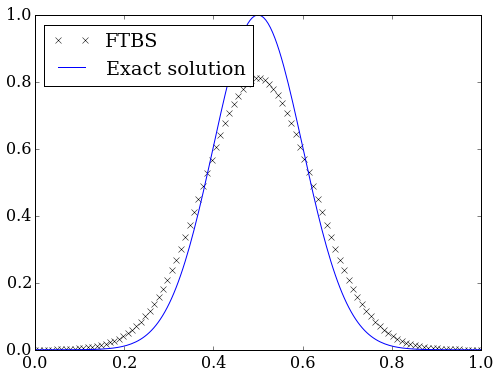

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'FTBS')
ax.plot(x_exact, advection_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend(loc=2)
plt.show()

In [33]:
Npoints = [10*2**i for i in range(10)]
h = 1.0 / (np.array(Npoints) + 1.0)
ftbs_advection_error = np.zeros_like(h)

for i in range(len(Npoints)):
    Nx = Npoints[i]
    delta = c * h[i]
    Nt = int(t_end / delta)+1

    x = np.linspace(0.0, 1.0, Nx+2)
    y = initial_data(x)
    ynew = np.zeros_like(y)
    for n in range(Nt):
        ftbs_advection(y, ynew, c)
        y = ynew
        
    ftbs_advection_error[i] = np.linalg.norm(y - advection_exact(x, t_end), 2) * np.sqrt(h[i])

In [34]:
fit = np.polyfit(np.log(h[5:]), np.log(ftbs_advection_error[5:]), 1)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.loglog(h, ftbs_advection_error, 'kx', label='Numerical Errors')
fitlabel = 'Best fit line slope {:.2f}'.format(fit[0])
ax.loglog(h, np.exp(fit[1])*h**(fit[0]), 'b-', label=fitlabel)
ax.set_xlabel("$h$")
ax.set_ylabel("Errors")
ax.legend(loc=2)
plt.show()

Apply FTBS to advection equation. Initial data a gaussian. Choose
timestep such that $c = 3/2$.

Result evolves in roughly the right fashion. Increasing resolution shows
an instability that blows up.

There is no convergence in this case.

In [35]:
Nx = 100
h = 1.0 / (Nx + 1.0)
t_end = 0.5
c = 3.0 / 2.0 # c = delta / h
delta = c * h
Nt = int(t_end / delta)+1

x = np.linspace(0.0, 1.0, Nx+2)
y = initial_data(x)
ynew = np.zeros_like(y)
for n in range(Nt):
    ftbs_advection(y, ynew, c)
    y = ynew

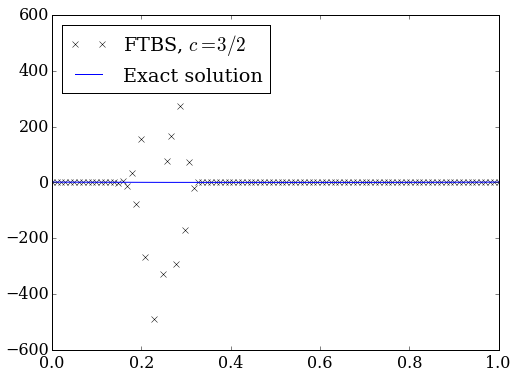

In [36]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x_exact = np.linspace(0.0, 1.0, 200)
ax.plot(x, y, 'kx', label = 'FTBS, $c = 3/2$')
ax.plot(x_exact, advection_exact(x_exact, t_end), 'b-', label='Exact solution')
ax.legend(loc=2)
plt.show()

Summary
=======

-   Finite difference methods result from the standard algorithm:

    1.  Introduce a grid

    2.  Replacing derivatives with finite differences

    3.  Rearrange to get either

-   an explicit update formula, or

-   an implicit equation which can be converted to a linear
    system.

-   For the heat equation the simple FTCS method is stable if $s < 1/2$, whereas the implicit BTCS method is good for all $s$.

-   For the advection equation FTCS is unstable for all $c$, whilst FTBS is stable if $c < 1$.

-   Von Neumann stability analysis in the next lecture will indicate the reasons for the results above.